In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [3]:
data_15 = pd.read_csv("/kaggle/input/world-happiness/2015.csv");
data_16 = pd.read_csv("/kaggle/input/world-happiness/2016.csv");    # I store them separately to work easily w/o confusions
data_17 = pd.read_csv("/kaggle/input/world-happiness/2017.csv");

In [4]:
data_17.info()  #checking values and the types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [5]:
data_15.head()      # what I see first is our data is sorted by Happiness Rank, 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data_15.tail()  # most important value seems to be "Happiness Score"

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [7]:
data_15.describe()  # getting more involved with the statistical side of dat

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [16]:
my_df = data_17.select_dtypes(exclude=[object])
my_df.corr()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


In [20]:
import seaborn as sns

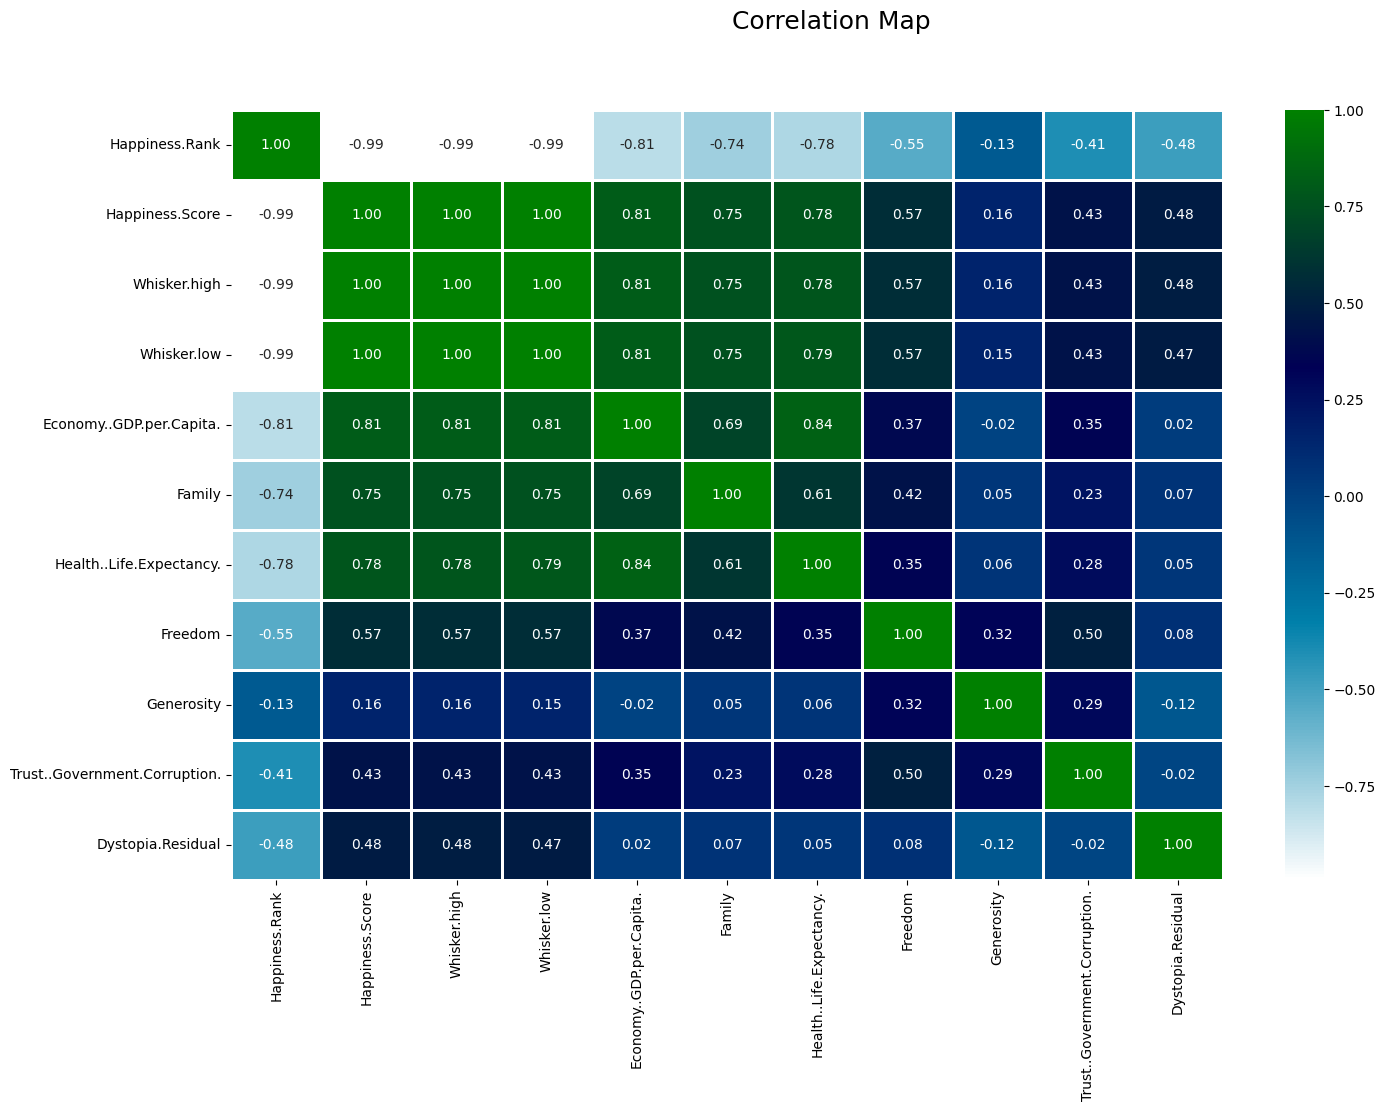

In [21]:
plt.figure(figsize=(16,10))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(my_df.corr(), annot=True, linewidths=1, cmap="ocean_r", fmt=".2f")  # seaborn has very simple solution for heatmap

plt.suptitle("Correlation Map", fontsize=18)

plt.show()   # whitest and greenest are most correlated
